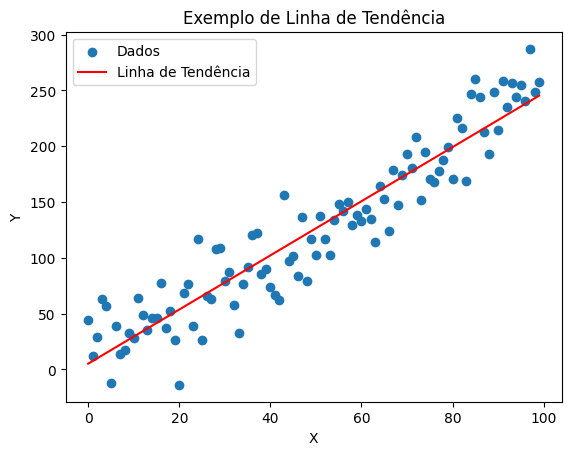

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Gerar dados de exemplo
np.random.seed(0)
x = np.arange(0, 100)
y = 2.5 * x + np.random.normal(0, 25, size=x.size)

# Criar gráfico de dispersão
plt.scatter(x, y, label='Dados')

# Ajustar uma linha de tendência
coef = np.polyfit(x, y, 1)  # Ajustar uma linha (polinômio de grau 1)
poly1d_fn = np.poly1d(coef)

# Plotar a linha de tendência
plt.plot(x, poly1d_fn(x), color='red', label='Linha de Tendência')

# Adicionar legendas e mostrar o gráfico
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Exemplo de Linha de Tendência')
plt.show()



In [2]:
from kivy.app import App
from kivy.uix.boxlayout import BoxLayout
from kivy.graphics import Rectangle, Color

class PressureBar(BoxLayout):
    pressure_value = 0  # Initial pressure value

    def __init__(self, **kwargs):
        super(PressureBar, self).__init__(**kwargs)
        self.orientation = 'vertical'  # Align pressure value and bar vertically

        # Create a label to display the pressure value
        self.pressure_label = Label(text=str(self.pressure_value) + ' psi',  # Assuming psi units
                                    font_size=24,
                                    halign='center',
                                    valign='top')  # Align at top of the bar

        # Create the rectangle for the pressure bar
        self.pressure_rect = Rectangle(pos=self.pos, size=self.size, texture=None)  # No background texture

        # Bind the pressure value to the label text for dynamic updates
        self.bind(pressure_value=self.update_pressure_label)

        self.add_widget(self.pressure_label)
        self.add_widget(self.pressure_rect)

    def update_pressure_label(self, instance, value):
        self.pressure_label.text = str(value) + ' psi'  # Update label with new pressure value

    def set_pressure(self, pressure):
        self.pressure_value = pressure
        # Update the rectangle's height based on the pressure value (assuming higher pressure = higher bar)
        self.pressure_rect.size_hint_y = min(1, pressure / 100)  # Normalize pressure to 0-1 range (adjust max value as needed)

class PressureBarApp(App):
    def build(self):
        return PressureBar()

if __name__ == '__main__':
    PressureBarApp().run()

OSError: source code not available